In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('movies_dataset.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.describe()
# The studied timeframe is from 1980 to 2020
# Average runtime is 1 hr 47 min

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


### Missing data

In [4]:
for col in df.columns:
    sum_missing = sum(df[col].isnull())
    pct_missing = round(np.mean(df[col].isnull())*100,2)
    print('{}-{} ({}%)'.format(col,sum_missing,pct_missing))

name-0 (0.0%)
rating-77 (1.0%)
genre-0 (0.0%)
year-0 (0.0%)
released-2 (0.03%)
score-3 (0.04%)
votes-3 (0.04%)
director-0 (0.0%)
writer-3 (0.04%)
star-1 (0.01%)
country-3 (0.04%)
budget-2171 (28.31%)
gross-189 (2.46%)
company-17 (0.22%)
runtime-4 (0.05%)


#### 'Released' column

In [5]:
# Drop missing data in 'released' column?

# Extract date from 'released' column
df['released_date'] = pd.to_datetime(df.released.str.split('(', expand=True)[0])
df['release_year'] = df['released_date'].dt.year.astype('Int64')
df['release_year'].head(5)

0    1980
1    1980
2    1980
3    1980
4    1980
Name: release_year, dtype: Int64

In [6]:
# test if 'year' column and 'release year' are the same
df2 = df.dropna(subset=['release_year'])
df2['Year_Check'] = np.where(df2['year'] == df2['release_year'], 'same', 'different')
lst = [x for x in df2['Year_Check'] if 'different' in x]
print(lst[:5])
# hypothetically column 'year' should be same as 'released_year' column but some rows are different. Cannot replace
# 'released_year' missing data with 'year' column. 
# Ok to drop missing values in 'released' column

['different', 'different', 'different', 'different', 'different']


C:\Users\shuch\AppData\Local\Temp/ipykernel_17912/3021561524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year_Check'] = np.where(df2['year'] == df2['release_year'], 'same', 'different')


In [7]:
df.dropna(subset=['released'], inplace = True)

In [8]:
# Drop independent variables and low missing data.
df.dropna(subset=['rating','score','votes', 'writer','star','country','company','runtime','gross'], inplace=True)

In [9]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,1980


#### 'Budget' column

Text(-2.6999999999999886, 0.5, 'frequrency')

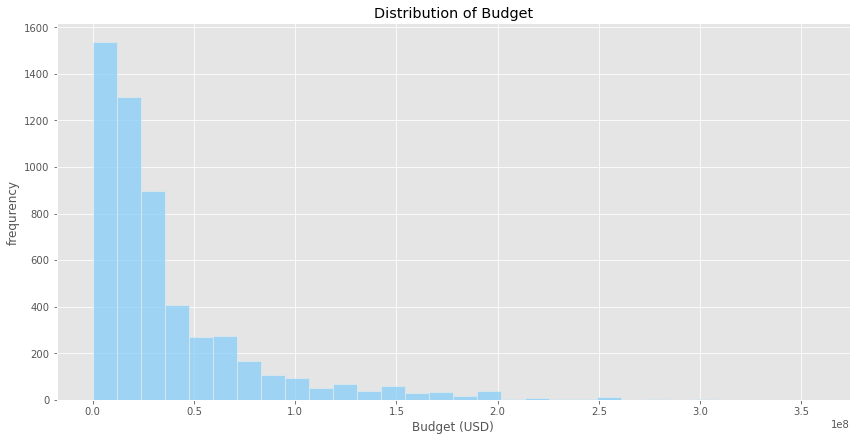

In [10]:
# Missing data for 'budget' is around 28%. Too much to drop. Find the best way to replace missing values

sns.displot(df['budget'].dropna(), color='lightskyblue', bins=30, height = 6, aspect = 2)
plt.title('Distribution of Budget')
plt.xlabel('Budget (USD)')
plt.ylabel('frequrency')

# The distribution is skewed to the right. Should not replace missing values with the mean.

       The distribution is skewed to the right. Should not replace missing values with the mean.

<AxesSubplot:xlabel='genre', ylabel='budget'>

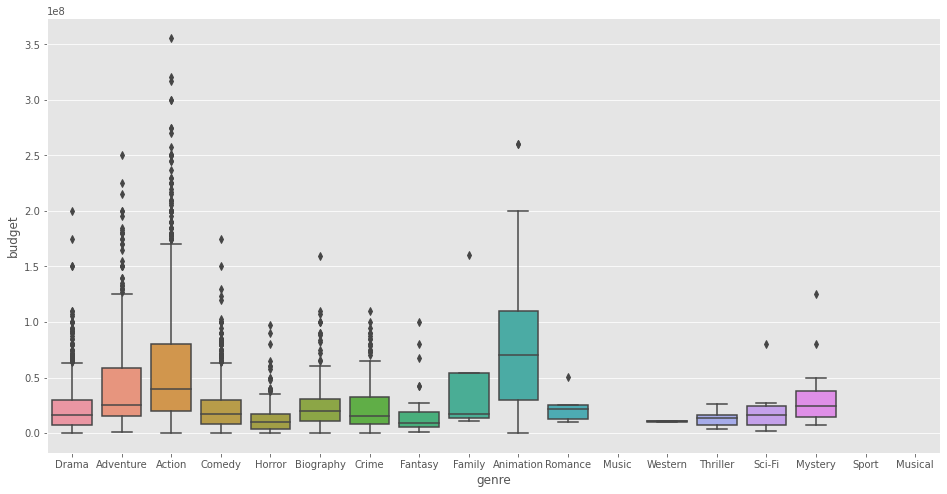

In [11]:
# Distribution of budget by genre

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='genre', y ='budget')

In [12]:
# no data for music, sport and musical genre. Drop them
df.drop(df[(df['genre'] == 'Music')|(df['genre'] == 'Sport')|(df['genre'] == 'Musical')].index, inplace=True)

In [13]:
# Use KNN Imputation to replace missing values

# first encode categorical data
df_numerized = df.copy()

for cols in df_numerized.columns:
    if cols == 'released':
        pass
    elif df_numerized[cols].dtypes == 'object':
        df_numerized[cols] = df_numerized[cols].astype('category')
        df_numerized[cols] = df_numerized[cols].cat.codes
        
df_numerized.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release_year
0,6369,6,6,1980,"June 13, 1980 (United States)",8.4,927000.0,2469,3848,978,52,19000000.0,46998772.0,2176,146.0,1980-06-13,1980
1,5370,6,1,1980,"July 2, 1980 (United States)",5.8,65000.0,2167,1562,305,53,4500000.0,58853106.0,686,104.0,1980-07-02,1980
2,4953,4,0,1980,"June 20, 1980 (United States)",8.7,1200000.0,1062,2462,1641,53,18000000.0,538375067.0,1443,124.0,1980-06-20,1980
3,276,4,4,1980,"July 2, 1980 (United States)",7.7,221000.0,1247,1918,2110,53,3500000.0,83453539.0,1694,88.0,1980-07-02,1980
4,991,6,4,1980,"July 25, 1980 (United States)",7.3,108000.0,1009,498,386,53,6000000.0,39846344.0,1662,98.0,1980-07-25,1980


In [14]:
df_numerized = df_numerized.drop(['released','released_date'], axis=1)
df_numerized.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6369,6,6,1980,8.4,927000.0,2469,3848,978,52,19000000.0,46998772.0,2176,146.0,1980
1,5370,6,1,1980,5.8,65000.0,2167,1562,305,53,4500000.0,58853106.0,686,104.0,1980
2,4953,4,0,1980,8.7,1200000.0,1062,2462,1641,53,18000000.0,538375067.0,1443,124.0,1980
3,276,4,4,1980,7.7,221000.0,1247,1918,2110,53,3500000.0,83453539.0,1694,88.0,1980
4,991,6,4,1980,7.3,108000.0,1009,498,386,53,6000000.0,39846344.0,1662,98.0,1980


In [15]:
# scale each feature using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df_numerized), columns = df_numerized.columns)
df2.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,0.876910,0.545455,0.428571,0.0,0.878378,0.386223,0.877711,0.884598,0.369335,0.928571,0.053355,0.016507,0.972297,0.273927,0.0
1,0.739364,0.545455,0.071429,0.0,0.527027,0.027041,0.770352,0.359080,0.115181,0.946429,0.012624,0.020670,0.306524,0.135314,0.0
2,0.681950,0.363636,0.000000,0.0,0.918919,0.499978,0.377533,0.565977,0.619713,0.946429,0.050546,0.189086,0.644772,0.201320,0.0
3,0.038001,0.363636,0.285714,0.0,0.783784,0.092044,0.443299,0.440920,0.796828,0.946429,0.009815,0.029310,0.756926,0.082508,0.0
4,0.136445,0.545455,0.285714,0.0,0.729730,0.044958,0.358692,0.114483,0.145770,0.946429,0.016837,0.013995,0.742627,0.115512,0.0


In [16]:
# Apply KNN imputation

imputer = KNNImputer(n_neighbors = 5)
df2 = pd.DataFrame(imputer.fit_transform(df2), columns = df2.columns)

In [17]:
df2.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,0.876910,0.545455,0.428571,0.0,0.878378,0.386223,0.877711,0.884598,0.369335,0.928571,0.053355,0.016507,0.972297,0.273927,0.0
1,0.739364,0.545455,0.071429,0.0,0.527027,0.027041,0.770352,0.359080,0.115181,0.946429,0.012624,0.020670,0.306524,0.135314,0.0
2,0.681950,0.363636,0.000000,0.0,0.918919,0.499978,0.377533,0.565977,0.619713,0.946429,0.050546,0.189086,0.644772,0.201320,0.0
3,0.038001,0.363636,0.285714,0.0,0.783784,0.092044,0.443299,0.440920,0.796828,0.946429,0.009815,0.029310,0.756926,0.082508,0.0
4,0.136445,0.545455,0.285714,0.0,0.729730,0.044958,0.358692,0.114483,0.145770,0.946429,0.016837,0.013995,0.742627,0.115512,0.0


In [18]:
# undo scaling
df2 = pd.DataFrame(scaler.inverse_transform(df2), columns = df2.columns)

In [19]:
df2.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6369.0,6.0,6.0,1980.0,8.4,927000.0,2469.0,3848.0,978.0,52.0,19000000.0,46998772.0,2176.0,146.0,1980.0
1,5370.0,6.0,1.0,1980.0,5.8,65000.0,2167.0,1562.0,305.0,53.0,4500000.0,58853106.0,686.0,104.0,1980.0
2,4953.0,4.0,0.0,1980.0,8.7,1200000.0,1062.0,2462.0,1641.0,53.0,18000000.0,538375067.0,1443.0,124.0,1980.0
3,276.0,4.0,4.0,1980.0,7.7,221000.0,1247.0,1918.0,2110.0,53.0,3500000.0,83453539.0,1694.0,88.0,1980.0
4,991.0,6.0,4.0,1980.0,7.3,108000.0,1009.0,498.0,386.0,53.0,6000000.0,39846344.0,1662.0,98.0,1980.0


In [20]:
# apply 'budget' column from df2 (with KNN imputer applied) to df 'budget' column
df['budget'] = df2['budget'].values

In [21]:
for col in df.columns:
    sum_missing = sum(df[col].isnull())
    pct_missing = round(np.mean(df[col].isnull())*100,2)
    print('{}-{} ({}%)'.format(col,sum_missing,pct_missing))

name-0 (0.0%)
rating-0 (0.0%)
genre-0 (0.0%)
year-0 (0.0%)
released-0 (0.0%)
score-0 (0.0%)
votes-0 (0.0%)
director-0 (0.0%)
writer-0 (0.0%)
star-0 (0.0%)
country-0 (0.0%)
budget-0 (0.0%)
gross-0 (0.0%)
company-0 (0.0%)
runtime-0 (0.0%)
released_date-0 (0.0%)
release_year-0 (0.0%)


     no more missing values

In [22]:
# Change data type

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('Int64')

In [23]:
# check duplicates
df[df.duplicated(subset = ['name', 'genre', 'company','release_year'])]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release_year


     no duplicates

### Analysis

Text(0.5, 0, 'Year')

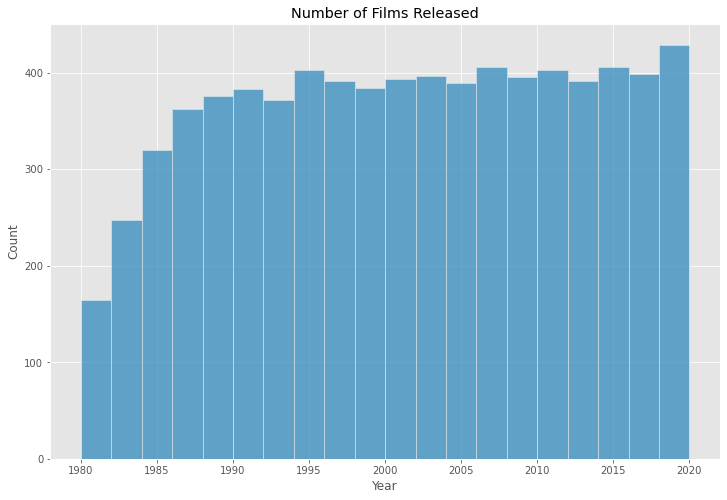

In [24]:
sns.histplot(data=df, x='release_year', bins=20)
plt.title('Number of Films Released')
plt.xlabel('Year')

           Numbers of films studied per year is around the same

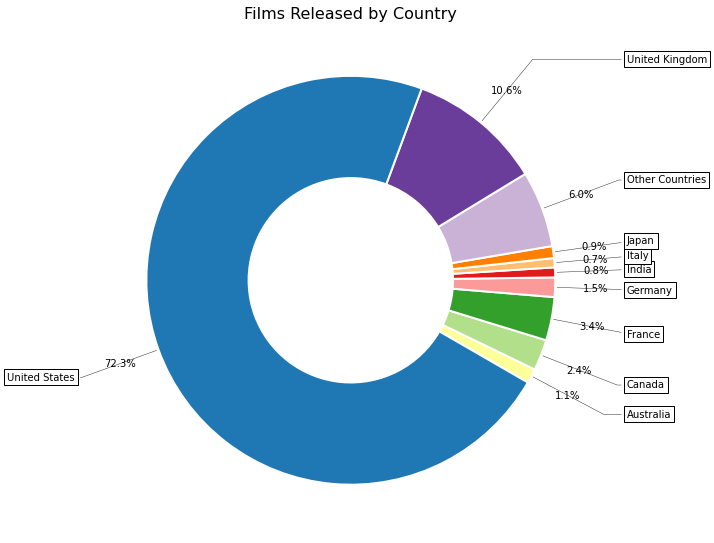

In [25]:
# Find percentage of movies released by country

country_group = df.groupby('country')['name'].count().reset_index()
Country = []

[Country.append([country, counts]) if counts > 50 else Country.append(['Other Countries',counts]) 
for country, counts in zip(country_group['country'], country_group['name']) ]                                                               

Country = pd.DataFrame(Country, columns = ['country','Film_Released'])

cmap = plt.get_cmap("Paired")
colors = cmap(np.array([10,2,3,4,5,6,7,8,9,1]))
labels = Country.groupby(['country']).sum().index

fig, ax = plt.subplots(figsize = (9,8))
wedges, texts, autotexts = ax.pie(
           x=Country.groupby(['country']).sum()['Film_Released'],
           startangle = -30,
           autopct = '%1.1f%%',
           wedgeprops={'width':0.5,'edgecolor': 'white','linewidth': 2},
           colors=colors,
           pctdistance = 1.2
          )

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-", color = "0.2"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Films Released by Country', fontsize=16)
plt.tight_layout()

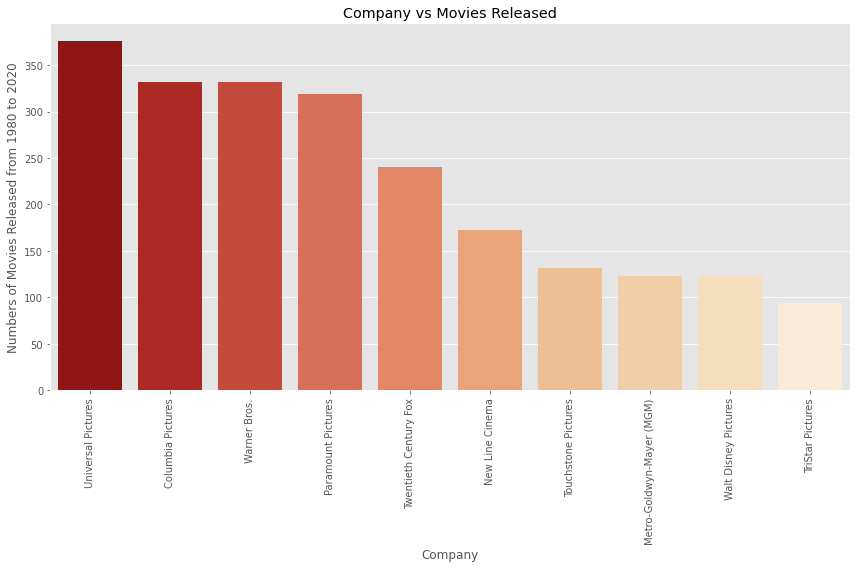

In [26]:
# Top 10 companies with the most movies released
company = df.groupby('company')['name'].count().sort_values(ascending=False).head(10)

sns.barplot(data=company, x=company.index, y=company.values, order=company.values, palette='OrRd_r')
plt.title('Company vs Movies Released')
plt.xlabel('Company')
plt.ylabel('Numbers of Movies Released from 1980 to 2020')
plt.xticks(ticks=np.arange(len(company.index)), labels = company.index, rotation='vertical')
plt.tight_layout()

In [27]:
# Top 10 companies with highest gross
df.groupby('company')['gross'].sum().sort_values(ascending=False).head(10)

company
Warner Bros.             56329179122
Universal Pictures       52514188890
Columbia Pictures        43008941346
Paramount Pictures       40493607415
Twentieth Century Fox    40257053857
Walt Disney Pictures     36327887792
New Line Cinema          19867862616
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Touchstone Pictures      11795832638
Name: gross, dtype: Int64

     Warner Bros has the highest gross

In [28]:
# Top 10 companies with highest gross by genre
df.groupby(['company','genre'])['gross'].sum().sort_values(ascending=False).head(10)

company                genre    
Warner Bros.           Action       31014361296
Paramount Pictures     Action       23320396397
Columbia Pictures      Action       22761958911
Universal Pictures     Action       22603884633
Twentieth Century Fox  Action       21716376612
Marvel Studios         Action       15065592411
Walt Disney Pictures   Animation    13842344597
Universal Pictures     Comedy       13832870982
Walt Disney Pictures   Action       12929945134
DreamWorks Animation   Animation    11873612858
Name: gross, dtype: Int64

    'Action' movies have the highest gross and also produced by companies that released the most films. Although Universal      Pictures released 44 more movies than Warner Bros, but Warner Bros has the highest gross

<Figure size 1440x432 with 0 Axes>

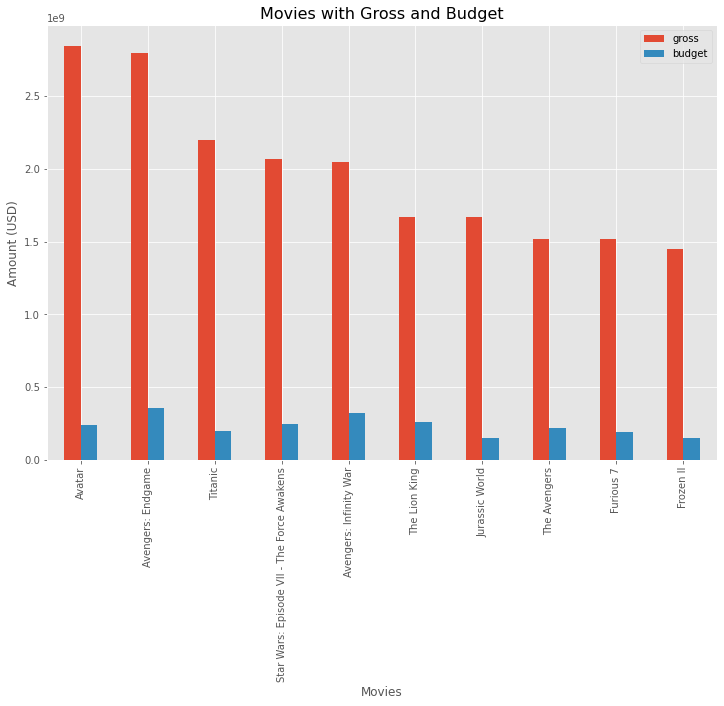

In [29]:
# Top 10 grossing movies and compare with their budgets
Top10Gross=df[['name','budget','gross']].sort_values(by='gross', ascending=False).head(10)

plt.figure(figsize=(20,6))
Top10Gross.plot(x='name', y=['gross','budget'], kind='bar')
plt.title('Movies with Gross and Budget', fontsize=16)
plt.xlabel('Movies')
plt.ylabel('Amount (USD)')
plt.show()

Text(0.5, 1.0, 'Genre vs Gross Earnings')

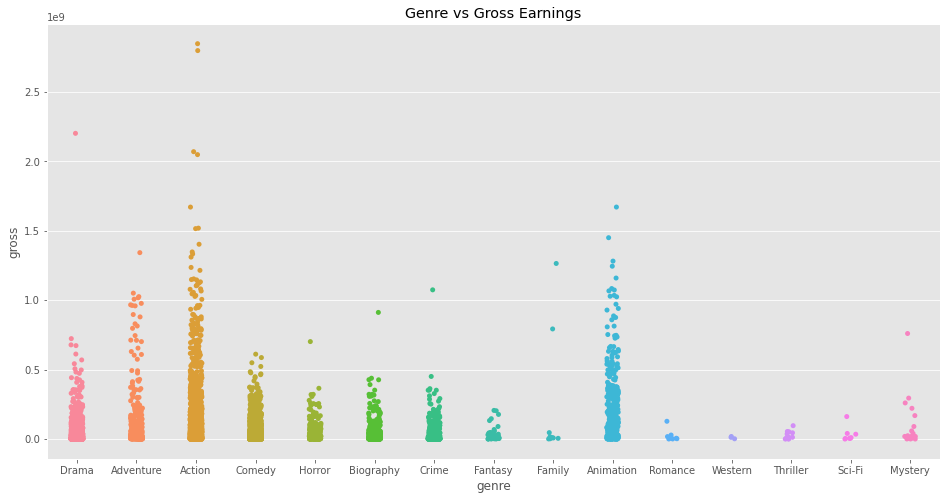

In [30]:
plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='genre', y='gross')
plt.title('Genre vs Gross Earnings')

##### Correlations

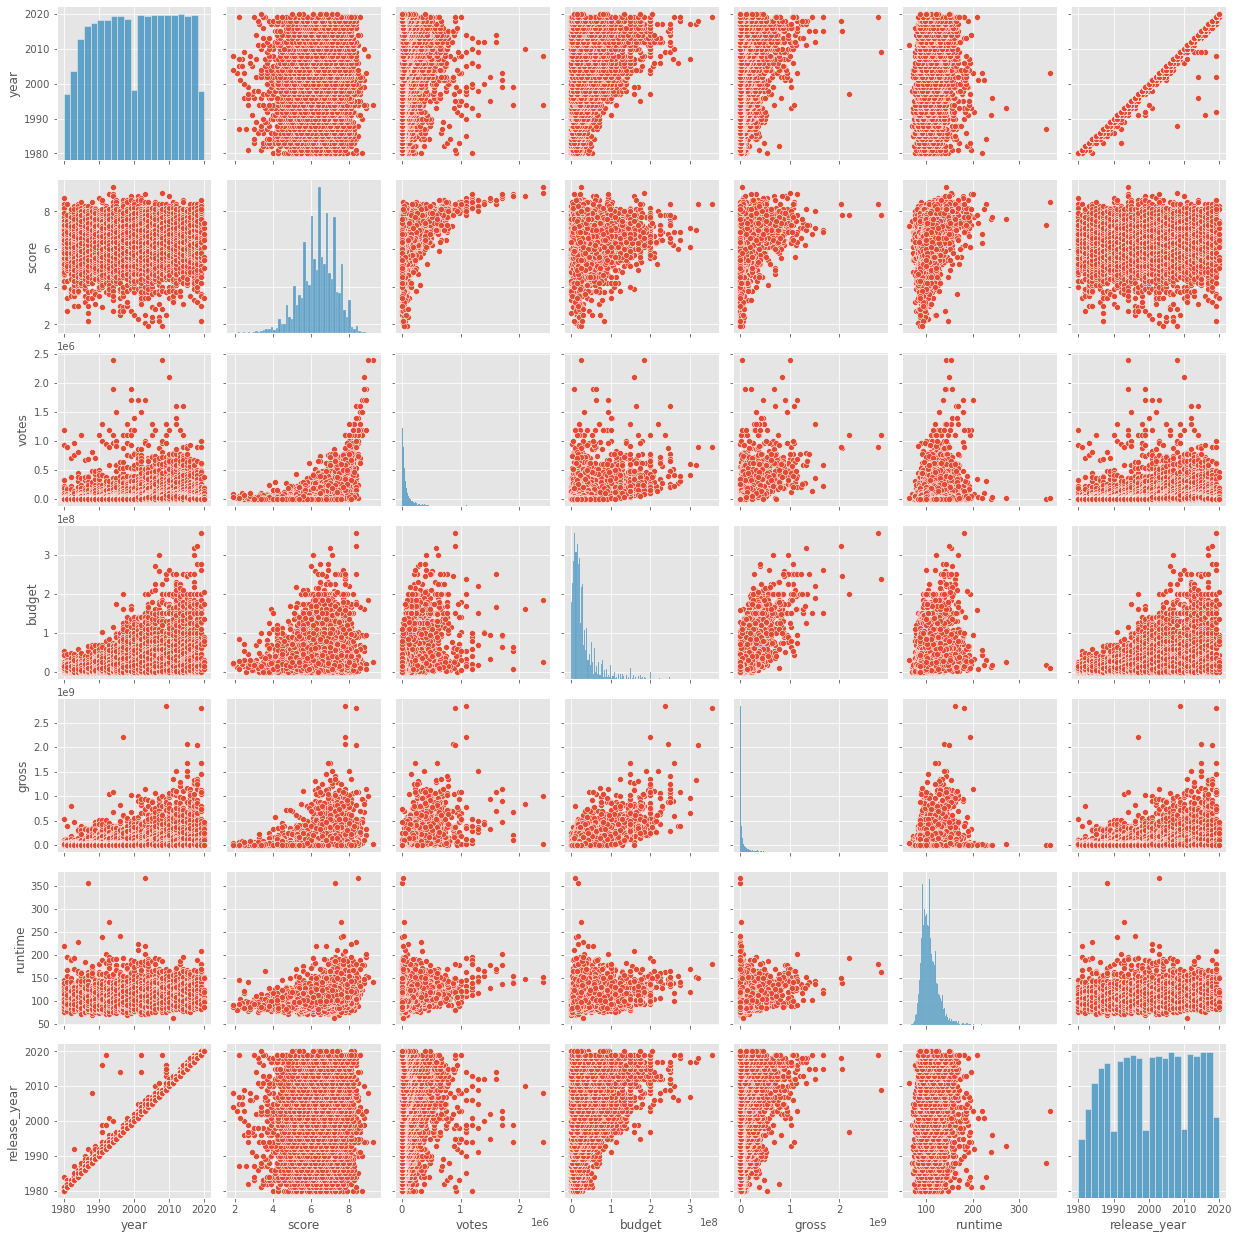

In [31]:
# Find pairwise relationships
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

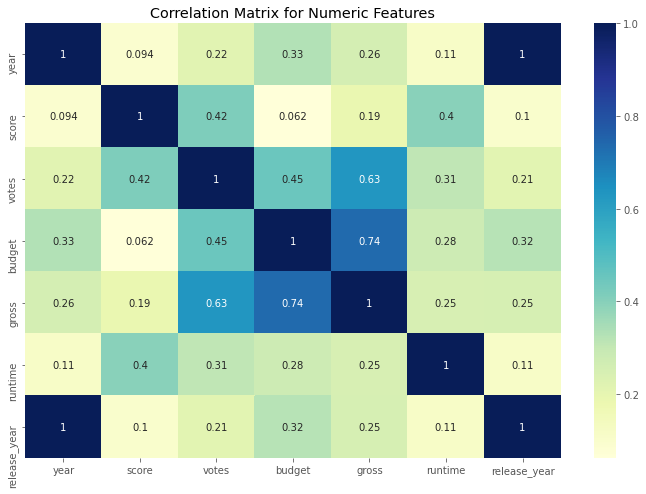

In [32]:
# Find correlations in numerical features
sns.heatmap(data=df.corr(), annot=True, cmap = 'YlGnBu')
plt.title('Correlation Matrix for Numeric Features')

    votes and gross have high correlation
    budget and gross have high correlation

Text(0.5, 1.0, 'Budget vs Gross Earnings')

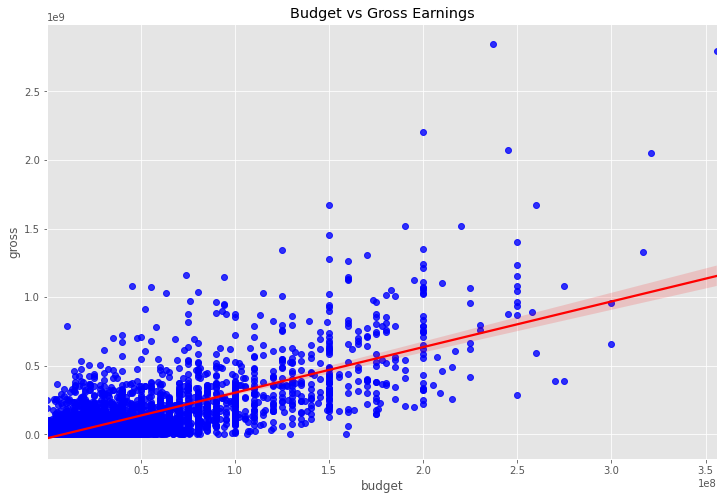

In [33]:
# budget vs gross

sns.regplot(data=df, x=df['budget'].astype(float), y=df['gross'].astype(float), scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.title('Budget vs Gross Earnings')

Text(0.5, 1.0, 'Votes vs Gross Earnings')

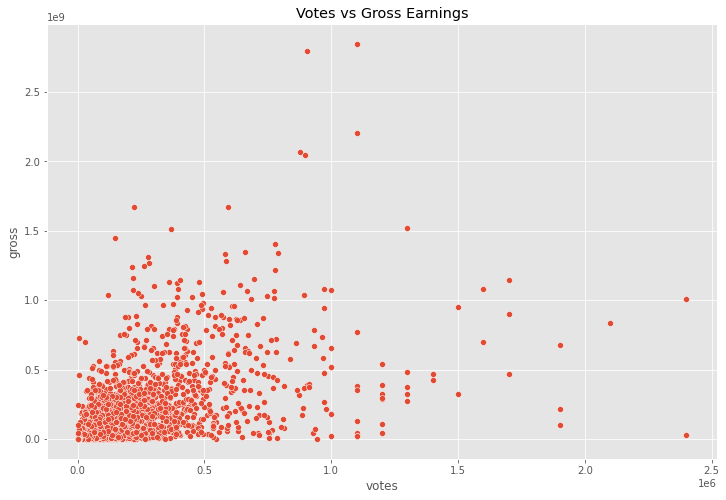

In [34]:
sns.scatterplot(data=df, x = 'votes', y='gross')
plt.title('Votes vs Gross Earnings')

In [43]:
# Find correlations in categorical features
# Numerize categorical columns
df_numerized = df.apply(lambda x:x.factorize()[0])
df_numerized.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,release_year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
2,2,1,2,0,2,2,2,2,2,2,1,2,2,2,2,2,0
3,3,1,3,0,1,3,3,3,3,3,1,3,3,3,3,1,0
4,4,0,3,0,3,4,4,4,4,4,1,4,4,4,4,3,0


Text(0.5, 1.0, 'Correlation matrix for Movies')

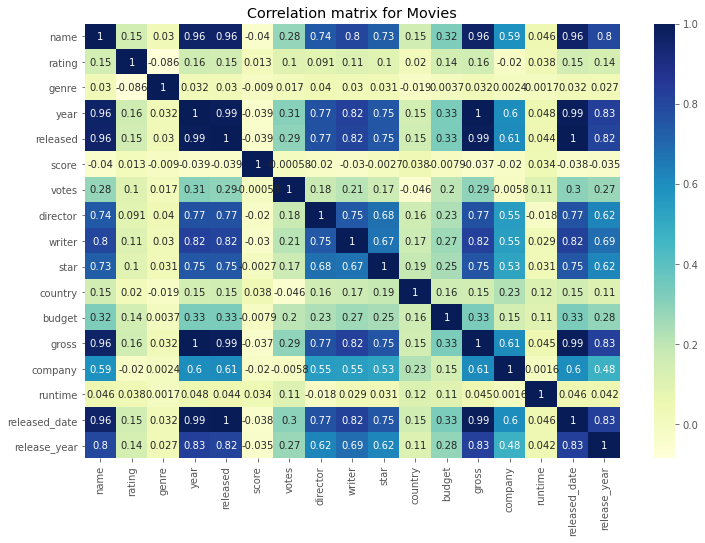

In [47]:
sns.heatmap(df_numerized.corr(method='pearson'), annot = True, cmap = 'YlGnBu')
plt.title("Correlation Matrix for Movies")

In [51]:
# Find pairs that have coefficient more than 0.5
pd.set_option('display.max_rows', 200)

sorted_pairs = df_numerized.corr(method='pearson').unstack().sort_values()
sorted_pairs[(sorted_pairs)>0.5]

company        star             0.527188
star           company          0.527188
company        writer           0.545539
writer         company          0.545539
company        director         0.551025
director       company          0.551025
company        name             0.592015
name           company          0.592015
year           company          0.601610
company        year             0.601610
released_date  company          0.604400
company        released_date    0.604400
gross          company          0.607596
company        gross            0.607596
released       company          0.608558
company        released         0.608558
release_year   star             0.621303
star           release_year     0.621303
release_year   director         0.623160
director       release_year     0.623160
writer         star             0.672430
star           writer           0.672430
director       star             0.678494
star           director         0.678494
release_year   w

In [63]:
# Top 10 directors with highest gross
df_director = df.groupby('director')['gross'].sum().sort_values(ascending=False)
df_director.head(10)

director
Steven Spielberg     9629049370
Anthony Russo        6844248984
Peter Jackson        6618045788
Michael Bay          6451692798
James Cameron        6248088578
David Yates          6021591899
Christopher Nolan    5153547948
J.J. Abrams          4659375464
Tim Burton           4456348890
Ron Howard           4409188200
Name: gross, dtype: Int64

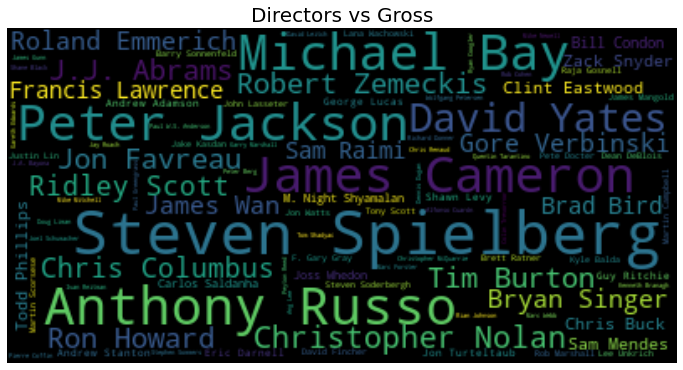

In [68]:
# Use wordcloud as visual representations of directors and gross.
# Larger text = higher gross

wordcloud = WordCloud().generate_from_frequencies(df_director)
plt.figure()
plt.title('Directors vs Gross', fontsize=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

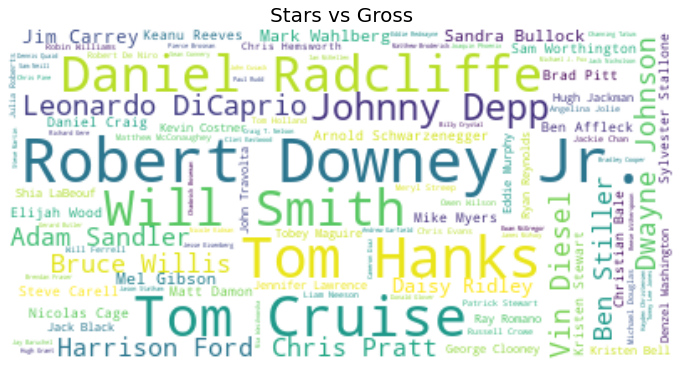

In [72]:
# Larger text = higher gross
df_star = df.groupby('star')['gross'].sum().sort_values(ascending=False)

wordcloud = WordCloud(background_color ='white').generate_from_frequencies(df_star)
plt.figure()
plt.title('Stars vs Gross', fontsize=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

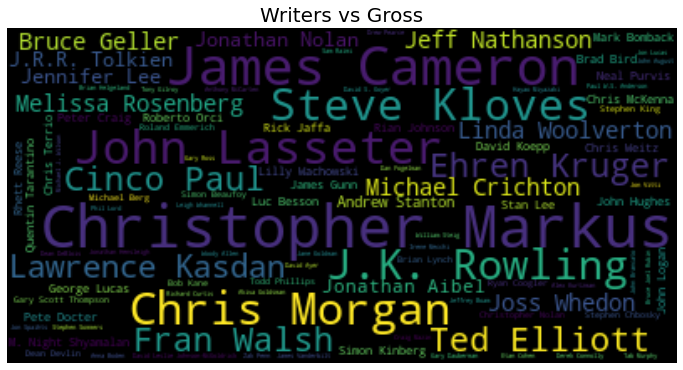

In [73]:
# Larger text = higher gross

df_writer = df.groupby('writer')['gross'].sum().sort_values(ascending=False)

wordcloud = WordCloud().generate_from_frequencies(df_writer)
plt.figure()
plt.title('Writers vs Gross', fontsize=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()